# L'optimisation ☕️☕️


**<span style='color:blue'> Objectifs de la séquence</span>** 
* Être capable de&nbsp;:
    * De résoudre des problèmes de la forme $x^\star\in\text{argmin}_{x\in\mathbb{R}^d}f(x)$, avec  $f:\mathbb{R}^d\mapsto\mathbb{R}$
    * Comprendre et d'implémenter certains des algorithmes d'optimisation les plus connus,
* D'être sensibilisés&nbsp;:
    * Aux propriétés importantes (e.g. convexité, Lipschitz),
    * Aux limites des algorithmes,
    


 ----

## I. La descente de gradient (à pas constant)
### A. Exploration en dimension 1

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def f(x):
    return x**2-2*x+2
    #return (np.cos(1/x)*x**(1/2))
def df(x):
    return 2*x-2
    #return np.sin(1/x)/(x**2)*x**(1/2)+1/2*np.cos(1/x)*x**(-3/2)
    
def g(x):
    return (np.cos(1/x)*x**(1/2))
def dg(x):
    return np.sin(1/x)/(x**2)*x**(1/2)+1/2*np.cos(1/x)*x**(-3/2)    
# plot
t = np.arange(0.0001, 1.5 + 0.01, 0.001)
plt.figure(figsize=(12.0, 8.0))
plt.plot(t, f(t), color='blue')
plt.plot(t, 0*t, color='black', alpha=0.8)
plt.plot(t, g(t))
#plt.plot(t, t**(1/2),color='gray')
#plt.plot(t, -t**(1/2),color='gray')
plt.grid(True)
plt.show()

<Figure size 1200x800 with 1 Axes>

Soit $x_0\in\mathbb{R}$, un algorithme permettant de chercher un minimum local en partant de $x_0$ est la descente de gradient. 

Ce dernier suppose que nous avons accès aux informations du premier ordre&nbsp;: le gradient $\nabla f(x)$, en dimension 1, c'est la dérivée $f^\prime(x)$, qui donne une information sur la croissance de la fonction $f$ que l'on va interpréter de la façon suivante :

$\bullet$ si $f^\prime(x)<0$ alors la fonction est décroissante autrement dit si $x$ augmente "un peu" alors $f(x)$ diminue. Ainsi pour se rapprocher d'un argmin (s'il existe et peut être seulement local) de $f$, on va augmenter la valeur de $x$. On va faire un pas "à droite" : $x - \eta\,f^\prime(x)$ où $\eta>0$. L'opposé de la dérivée donne la direction. 

$\bullet$ si $f^\prime(x)>0$ alors la fonction est croissante autrement dit si $x$ augmente "un peu" alors $f(x)$ augmente, ce qui revient à dire que si $x$ diminue "un peu" alors $f(x)$ diminue. Ainsi pour se rapprocher d'un argmin (s'il existe et peut être seulement local) de $f$, on va diminuer la valeur de $x$. On va faire un pas "à gauche" : $x - \eta\,f^\prime(x)$ où $\eta>0$. L'opposé de la dérivée donne la direction.

L'idée de l'algorithme de descente de gradient est de suivre la direction opposée donnée par le gradient, par petits pas. Nous avons ainsi&nbsp;:

$$\boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-\eta\nabla f(\boldsymbol{x}_{n})$$

où $\eta>0$ est un paramètre permettant de contrôler la taille du pas.

### B. Implémentation en dimension 1

In [2]:
def GradDim1(f, df, x_0, learning_rate =None, nb_iterations=None):
    if nb_iterations==None:
        nb_iterations=5
    if learning_rate==None:
        learning_rate=0.1    
    optimization_steps = []
    x_t = x_0        
    for i in range(nb_iterations):
        ########### A compléter ###########
        x_t = x_t - learning_rate*df(x_t)
        ###################################
        optimization_steps.append([x_t, 0])      
    return np.array(optimization_steps)
    


def plot_curve_1D(f, x_start, optimization_steps=None):
    x = np.linspace(-3, 4, 1000)
    plt.figure(figsize=(12.0, 8.0))
    plt.plot(x, f(x), label='Function')
    plt.scatter([x_start], 0, label='Optimization starting point')
    if optimization_steps is not None:
        plt.scatter(optimization_steps[:, 0], optimization_steps[:, 1], 
                    color='blue', label='Optimization steps')
    #plt.title('Notre fonction $f$')
    plt.legend()
    plt.grid(True)
    plt.show()


3.4 6.759999999999999
2.92 4.686399999999999
2.536 3.3592960000000005
2.2288 2.5099494400000006
1.9830400000000001 1.9663676416000002
1.786432 1.618475290624
1.6291456 1.39582418599936
1.50331648 1.2533274790395903
1.402653184 1.1621295865853378
1.3221225472 1.1037629354146161
1.25769803776 1.0664082786653544
1.206158430208 1.0425012983458268
1.1649267441664 1.0272008309413292
1.1319413953331199 1.0174085318024506
1.105553116266496 1.0111414603535684
1.0844424930131968 1.0071305346262838
1.0675539944105574 1.0045635421608217
1.054043195528446 1.0029206669829258
1.0432345564227568 1.0018692268690725
1.0345876451382054 1.0011963051962065


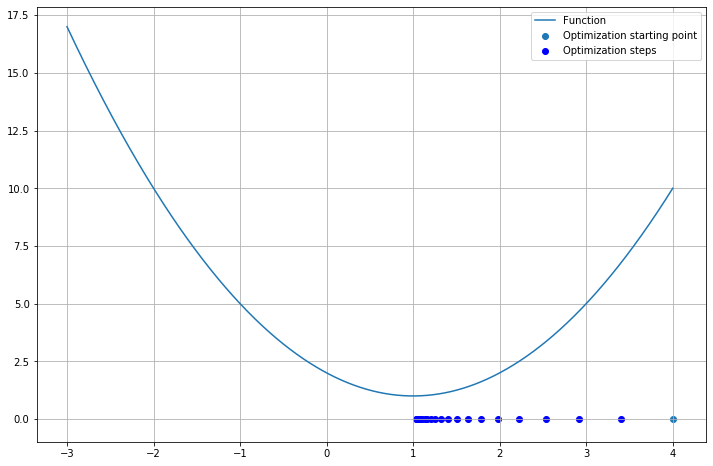

In [3]:
x_start = 4

optimization_steps = GradDim1(f, df, x_start, learning_rate=0.1, nb_iterations=20)
for x in optimization_steps:
    print(x[0],f(x[0]))
plot_curve_1D(f, x_start, optimization_steps)

Remarque :

Se pose comme toujours la question de la concergence de l'algorithme, la question de l'influence de $\eta$, ... cf ci-dessous.

-0.5 3.25
2.5 3.25
-0.5 3.25
2.5 3.25
-0.5 3.25
2.5 3.25
-0.5 3.25
2.5 3.25
-0.5 3.25
2.5 3.25


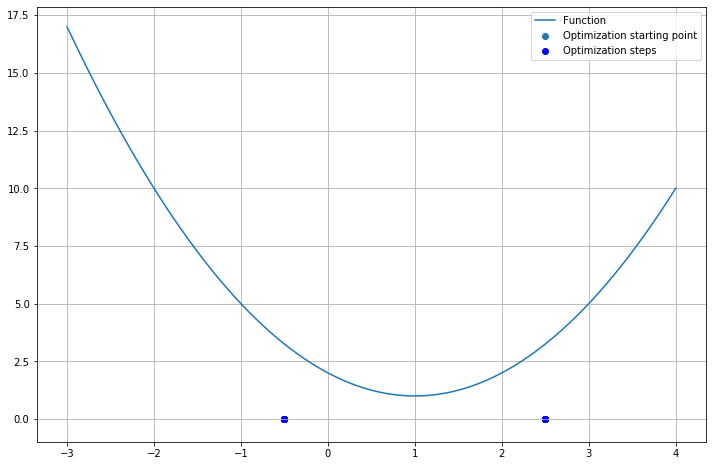

In [4]:
#suite alternée
x_start = 2.5
optimization_steps = GradDim1(f, df, x_start, learning_rate=1, nb_iterations=10)
for x in optimization_steps:
    print(x[0],f(x[0]))
plot_curve_1D(f, x_start, optimization_steps)

## C. Régularité des fonctions

Etant en dimension 1, la norme que nous allons utiliser est $\lVert\cdot\rVert=\lVert\cdot\rVert_2$ qui correspond à $\lvert\cdot\rvert$. Pour $x\in\mathbb{R}$, $\lVert x\rVert=\lVert x\rVert_2=\sqrt{x^2}=\lvert x\rvert$ 

En dimension 1, $d=p=1$.

----
**<span style='color:blue'> Définition (continuité Lipschitz)</span>** 

On dit qu'une fonction $f:\mathbb{R}^d\rightarrow\mathbb{R}^p$ est Lipschitz  si et seulement si&nbsp;:


$$\exists K\in\mathbb R^+ : \forall a, \forall  b, \lVert f(a)-f(b)\rVert\leq K\lVert a-b\rVert,$$

et on appelle $K$ constante Lipchitz.

----
**<span style='color:blue'> Fonction Lipschitz et dérivée</span>** 

Soit $f:\mathbb{R}\mapsto\mathbb{R}$ une fonction K-Lipschitz. On a donc pour $h\in\mathbb{R}$&nbsp;:

$$| f(x+h)-f(x)|\leq K| h|,$$

ce qui est équivalent à

$$\Big|\frac{f(x+h)-f(x)}{h}\Big|\leq K.$$


Si on prend la limite de $h$ en $0$, alors c'est la définition de la dérivée qui est donc majorée par $K$. Cette idée se généralise avec le gradient.

D'où le résultat :
<span style='border: 1px solid #969696; padding: 5px'> Une fonction $f$ dérivable sur un intervalle réel est lipschitzienne si et seulement si sa dérivée est bornée</span>

---

**<span style='color:blue'> Exercice </span>** 
**Soit la fonction $f(x)=x^2$ sur $\mathbb{R}$. Montrer que $f$ n'est pas Lipschitz mais que $f^\prime$ l'est.**



 ----

**<span style='color:orange'> Réponse</span>** 

-

(1) $f^\prime(x)=2x$ n'est pas bornée donc $f$ non Lipschitzienne


(2) $f^{\prime\prime}(x)=2$ est bornée par 2 donc $f^\prime$ est 2-Lipschitzienne

---

---
**<span style='color:blue'> Définition (fonction convexe)</span>** 

Soit $f:\mathcal{X}\mapsto\mathbb{R}$, $(x, y)\in\mathcal{X}^2$ où $\mathcal{X}$ est un ensemble convexe et $\lambda\in[0, 1]$. 

On dit que $f$ est convexe si $\forall x, \forall y, \forall \lambda\in[0, 1], f(\lambda x+ (1-\lambda)y)\leq \lambda f(x)+(1-\lambda) f(y)$

La convexité ne garantit pas l'existence d'un minimum ni son unicité mais l'équivalence entre minimum local et minimum global.

La convexité stricte est donnée par&nbsp;:

$$\begin{aligned}
f(\lambda x+ (1-\lambda)y)&< \lambda f(x)+(1-\lambda) f(y)
\end{aligned}$$

qui elle implique l'unicité du minimum s'il existe.


 ----
Ainsi, si notre algorihtme trouve un minimum local, alors ce dernier est soit unique - convexité stricte - ou à minima, minimise notre fonction objectif. Attention, la convexité ne garantit jamais l'existence de ce minium. Pour cela, il faut une autre propriété.

**<span style='color:blue'> Définition (fonction coercive)</span>** Une fonction $f$ est coercive si&nbsp;:

$$\lim_{\lVert x\rVert\rightarrow\infty}f(x)=\infty.$$

Si notre fonction est propre (ne vaut pas partout $+\infty$ et n'atteint pas $-\infty$) et convexe, alors la coercivité implique l'existence d'un minimum. Une fonction propre strictement convexe possède donc un unique minimum.


 ----
La convexité est une propriété suffisante pour garantir la "qualité" d'un minimum. Dans la cadre des fonctions strictement convexes, la coercivité est une propriété nécessaire et suffisante pour garantir l'existence d'un minimum.


### D. Convergence de l'algorithme

---
**<span style='color:blue'> Un théorème (de convergence de la descente de gradient)</span>** 

L'algorithme est associé à la suite $(x_n)$ définie par $\boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-\eta\nabla f(\boldsymbol{x}_{n})$.

Si $f:\mathbb{R}^d\rightarrow\mathbb{R}$ notre fonction à optimiser, convexe et différentiable, $x^\star$ une solution du problème et supposant $\nabla f$ $L$-Lipchitzienne,

Alors la suite $(f(x_n))$ est décroissante et converge vers $f(x^\star)$.

---
On peut obtenir plus, en fixant le pas d'optimisation $\eta \leq 1/L$. Nous avons :

$$f(x_{n})-f(x^\star)\leq \frac{\lVert x^{(0)}-x^\star\rVert^2}{2 n\eta},$$

où, le numérateur étant constant, la partie droite converge vers $0$ à une vitesse proportionnelle à $1/n$.



----

**<span style='color:orange'> Preuve en dimension 1 ($d=1$) de la première partie</span>** 

(Cette preuve se généralise en dimension supérieure)

D'après le théorème fondamental de l'analyse, nous avons :
$$
f(a) - f(b) = \int_0^1 \nabla f(b+t(a-b)) (a-b) dt = \int_0^1 f^\prime(b+t(a-b)) (a-b) dt
$$
donc
$$\begin{aligned}
f(a) - f(b) - f^\prime(b)(a-b) &= \int_0^1 \left( f^\prime(b+t(a-b))-f^\prime(b)\right) (a-b)dt\\
&\leq \int_0^1 \left\vert f^\prime(b+t(a-b))-f^\prime(b)\right\vert \;\vert a-b\vert dt\\
&\leq \int_0^1 L\left\vert t(a-b)\right\vert \;\vert a-b\vert dt\\
&= L\,\vert a-b\vert^2 \int_0^1 t \;dt\\
&= \frac L2\,\vert a-b\vert^2 
\end{aligned}$$
on a donc $f(a) \leq f(b) + f^\prime(b)(a-b) +\frac L2\,\vert a-b\vert^2 $

Appliquons cette inégalité aux termes consécutif de la suite $(x_n)$ en utilisant que $\boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-\eta\nabla f(\boldsymbol{x}_{n})$
:
$$\begin{aligned}
f(x_{n+1}) &\leq f(x_n) + f^\prime(x_n)(x_{n+1}-x_n) +\frac L2\,\vert x_{n+1}-x_n\vert^2 \\
&\leq f(x_n) + f^\prime(x_n)\left(-\eta f^\prime(x_n)\right) +\frac L2\,\left(\eta f^\prime(x_n)\right)^2\\
&=  f(x_n) + \left(f^\prime(x_n)\right)^2\times\eta\times\left(\eta\,\frac L2-1\right)\\
&\leq f(x_n) \quad \text{ dès que }\quad\eta\,\frac L2-1 <0 \text{ c'est à dire }\eta < \frac 2L
\end{aligned}$$

On vient de montrer que la suite $(f(x_n))$ est décroissante.

Si $x^\star$ une solution du problème, alors la suite est minorée et donc convergente

## E. En dimension $d\geq 2$

La plupart des algorithmes d'optimisation s'appuient sur des informations du premier ordre (i.e. dérivées, gradient).

**<span style='color:blue'> Gradient orthogonal aux lignes de niveau</span>** 
Soit $c:\mathbb{R}^+\mapsto\mathbb{R}^d$ un arc paramétré qui suit une ligne de niveau de $f$ (un arc paramétré prend en argument le "temps" et retourne une coordonnée dans l'espace). Si $c$ suit une ligne de niveau, nous avons donc&nbsp;:

$$f(c(t))=f(c(0))=\text{const}.$$

Cela implique que nous ayons aussi&nbsp;:

$$(f\circ c)^\prime(t)=\langle \nabla f(c(t)), c^\prime(t)\rangle=0,$$

où $\nabla f(c(t))$ est le gradient de $f$ en $c(t)$ et $c^\prime(t)$ donne la direction de l'arc paramétré (i.e. de la ligne de niveau) en $c(t)$). Les deux sont bien ainsi orthogonaux.


 ----
**<span style='color:blue'> Le gradient est la plus forte pente</span>** 
Soit $c:\mathbb{R}^+\mapsto\mathbb{R}^d$ un arc paramétré et soit $f:\mathbb{R}^d\mapsto\mathbb{R}$. Nous étudions l'évolution de $f$ le long de $c$&nbsp;:
$f(c(t))$

La dérivée suivant le vecteur non nul $v$ en un point donné, décrit la variation de $f$
autour de ce point lorsqu’on se déplace dans la direction $v$

Or

$$\langle \nabla f(c(t)), v\rangle = \lVert\nabla f(c(t))\rVert\lVert v\rVert \cos(\theta)$$

où $\theta$ est l'angle entre le gradient et le vecteur $v$. Le maximum est atteint lorsque $\theta=0$ c'est à dire lorsque $v$ est colinéaire au gradient autrement dit, la plus forte pente est donc la direction du gradient.


 ----

In [5]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d, Axes3D
import numpy as np

# Le code ci-dessous permettra d'afficher notre fonction à optimiser

%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)
plt.style.use('ggplot')

def plot_loss_contour(obj_func, param_trace=None, figsize=None, three_dim=False, rotate=12, 
                      starting=None, ending=None, constraint=None, title=None):
    
    x, y = np.mgrid[slice(-5, 5 + 0.1, 0.1),
                    slice(-5, 5 + 0.1, 0.1)]
    z = np.zeros(x.shape)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i, j] = obj_func([x[i, j], y[i, j]])
    if figsize is not None:
        f = plt.figure(figsize=figsize)
    else:
        f = plt.figure(figsize=(12.0, 8.0))
    if three_dim:
        ax = Axes3D(f, auto_add_to_figure=False)
        f.add_axes(ax)
    else:
        ax = f.gca()
    
    if three_dim:
        m = ax.plot_surface(x, y, z, cmap=cm.viridis)
    else:
        m = ax.contourf(x, y, z, levels = 15)
    #
    if param_trace is not None:
        if three_dim:
            eps = 0.5
            ax.plot(param_trace[:, 0], param_trace[:, 1], param_trace[:, 2] + eps, 
                    color='red')
            ax.view_init(65, rotate)
                
        else:
            if type(param_trace) is not tuple:
                param_trace = [param_trace]
            for p in param_trace:
                p = np.array(p) if type(p) is list else p
                plt.plot(p[:, 0], p[:, 1])
                plt.scatter(p[:, 0], p[:, 1])
            f.colorbar(m)
    if starting is not None:
        if three_dim:
            z = obj_func(starting)
            plt.plot([starting[0], starting[0]], [starting[1], starting[1]], [z, z+0.1], lw=4, 
                     color='red', label='Initialisation de l\'optimisation')
            plt.legend()
        else:
            plt.scatter(starting[0], starting[1], color='red', 
                        label='Initialisation de l\'optimisation')
            plt.legend()
            
    if constraint is not None:
        if not three_dim:
            plt.plot(constraint[:, 0], constraint[:, 1], color='red', label='Contrainte')
            plt.legend()
                
    if ending is not None:
        if three_dim:
            z = obj_func(ending)
            plt.plot([ending[0], ending[0]], [ending[1], ending[1]], [z, z+0.1], lw=4, 
                     color='green', label='Solution de l\'optimisation')
            plt.legend()
        else:
            plt.scatter(ending[0], ending[1], color='green', 
                        label='Solution de l\'optimisation')
            plt.legend()
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    if title is not None:
        plt.title(title)
    plt.show()

Considérons la fonction suivante qui admet plusieurs minimums locaux.

In [6]:
def f(x):
    x, y = x
    return np.sqrt((x**2 + y - 2)**2 + (x + y**2 - 7)**2)

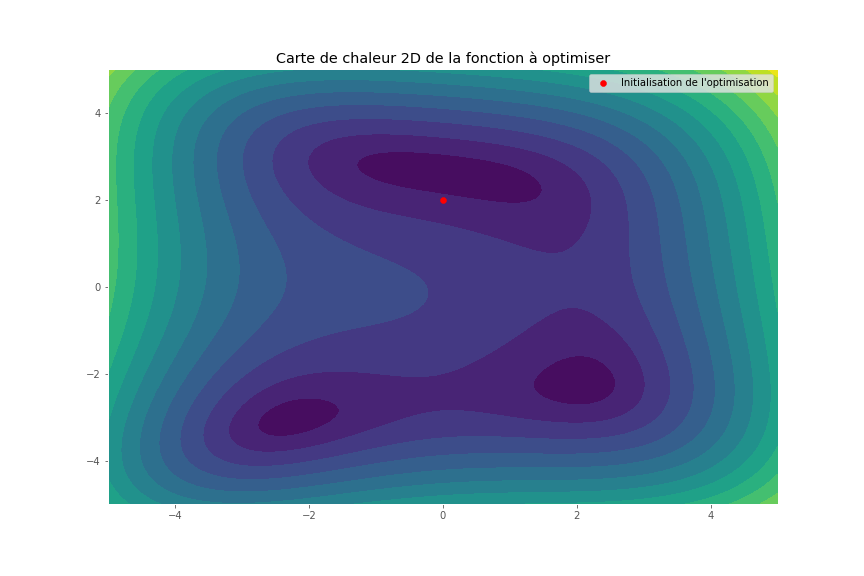

In [7]:
plot_loss_contour(f, three_dim=False, starting=[0, 2], 
                  title='Carte de chaleur 2D de la fonction à optimiser')

Il est également possible de la représenter en 3 dimensions.

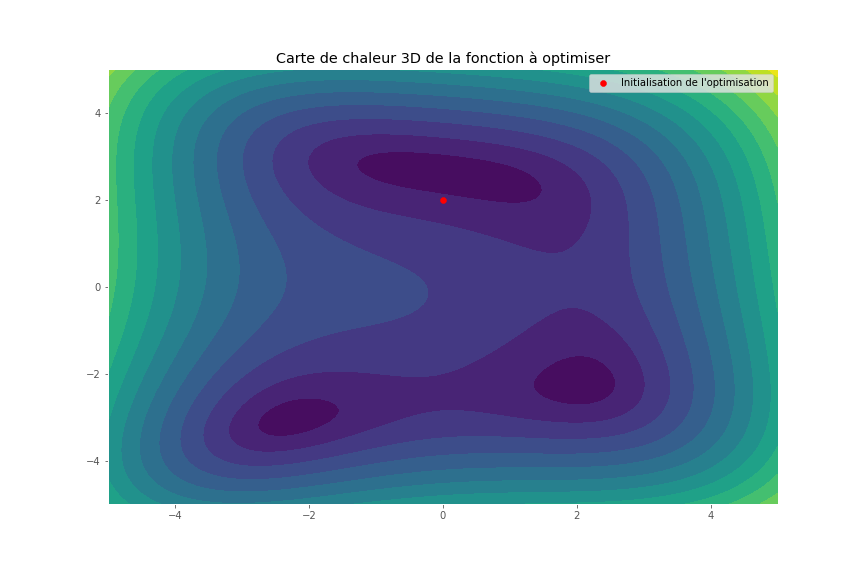

In [8]:
plot_loss_contour(f, three_dim=False, starting=[0, 2],
                  title='Carte de chaleur 3D de la fonction à optimiser')


Dit autrement, nous considérons $f:\mathbb{R}^2\mapsto\mathbb{R}$ définie par $f(x, y)=\sqrt{(x^2+y-2)^2+(x+y^2-7)^2}$. $f$ est continue et infiniment dérivable.

Nous avons en particulier les dérivées partielles suivantes&nbsp;: 


$$\frac{\partial f}{\partial x}(x, y)=\frac{2x^3+x(2y-3)+y^2-7}{\sqrt{(x^2+y-2)^2+(x+y^2-7)^2}}$$

et


$$\frac{\partial f}{\partial y}(x, y)=\frac{x^2+2xy+2y^3-13y-2}{\sqrt{(x^2+y-2)^2+(x+y^2-7)^2}}.$$

Sans hypothèse sur la fonction $f$, celle-ci peut être très difficile à minimiser. Soit $x^{(0)}\in\mathbb{R}^2$, un algorithme permettant de chercher un minimum local en partant de $x^{(0)}$ est la descente de gradient. Ce dernier suppose que nous avons accès aux informations du premier ordre&nbsp;: le gradient $\nabla f(x, y)$. Rappelons que le gradient est le vecteur construit à partir des dérivées partielles $\nabla f (x, y) = [\partial f(x,y)/\partial x, \partial f(x, y)/\partial y]^T$. Ce dernier donne le sens de la plus forte croissance de la fonction $f$. Son opposé donne la plus forte pente. L'idée de l'algorithme de descente de gradient est de suivre la direction donnée par ce dernier par petits pas. On note $\boldsymbol{x}=(x,y)$. Nous avons ainsi&nbsp;:

$$\boldsymbol{x}^{(t+1)}=\boldsymbol{x}^{(t)}-\eta\nabla f(\boldsymbol{x}^{(t)})$$

où $\eta>0$ est justement un paramètre permettant de contrôler la taille du pas.


**<span style='color:blue'> Exercice</span>** **Donnez le code permettant de calculer le gradient de la fonction précédente (en format vecteur ligne).**


 ----

In [9]:
def grad(x):
    ####### Complete this part ######## or die ####################
    v = f(x)
    x, y = x
    return np.array([
        (2*x**3+x*(2*y-3)+y**2-7)/v,
        (x**2+2*x*y+2*y**3-13*y-2)/v
    ])
    ###############################################################



**<span style='color:blue'> Exercice</span>** 
**Donnez le code permettant de calculer une itération de l'algorithme de descente de gradient. Attention, on appelle le pas d'optimisation $\eta$ le *learning rate*.**



 ----


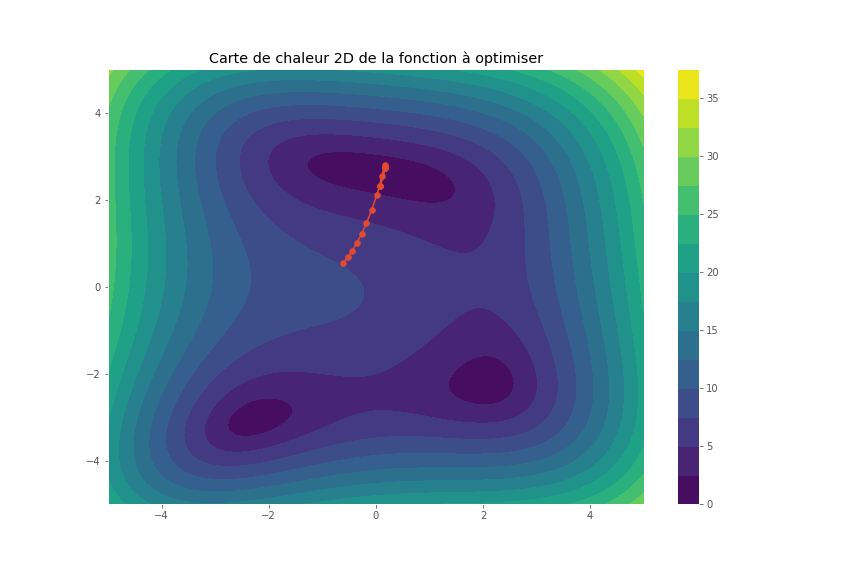

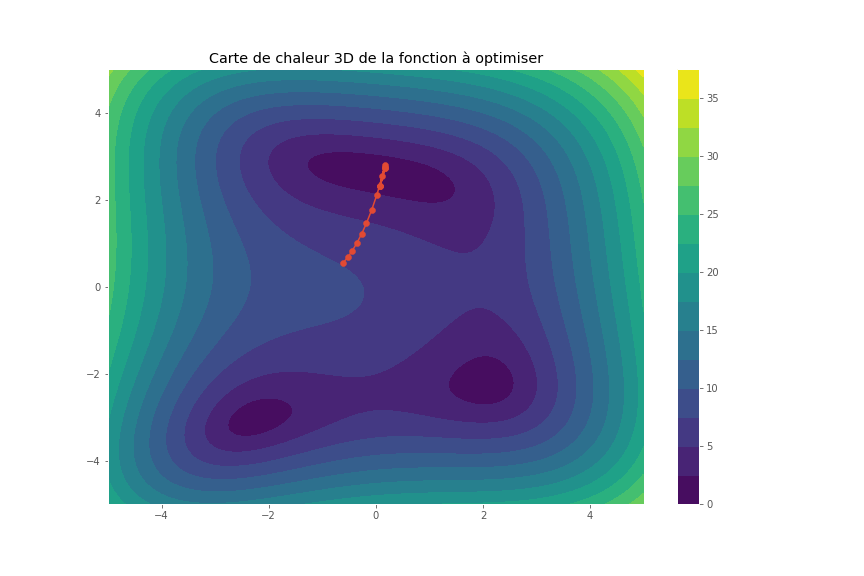

In [10]:
class GradientDescent(object):
    def optimize(self, learning_rate = 0.1, nb_iterations=15, beta=None):
        # beta est notre variable ! 
        # si elle n'est pas fixée on la tire au hasard
        if beta is None:
            beta = np.random.uniform(-2, 2, size=2)

        param_trace = [beta]
        loss_trace = [f(beta)]
        
        for i in range(nb_iterations):
            ####### Complete this part ######## or die ####################
            beta = beta - learning_rate * grad(beta)
            ###############################################################
            param_trace.append(beta)
            loss_trace.append(f(beta))
            
        return np.array(param_trace), np.array(loss_trace)
        
gd = GradientDescent()

p, l = gd.optimize()

plot_loss_contour(f, param_trace=p, three_dim=False, 
                  title='Carte de chaleur 2D de la fonction à optimiser')

plot_loss_contour(f, param_trace=np.concatenate([p, l.reshape((l.shape[0], 1))], axis=1), 
                  three_dim=False,  title='Carte de chaleur 3D de la fonction à optimiser')


In [11]:
# L'affichage suivant interactif va nous permettre de tester les différents paramètres de notre optimiseur.

import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output
%matplotlib inline

output = widgets.Output()

@output.capture()
def interactive_gradient_descent(x, y, learning_rate, iterations):
    clear_output()
    param_trace , loss_trace = gd.optimize(nb_iterations=iterations,
                                           learning_rate=learning_rate, 
                                           beta=np.array([x, y]))
    plot_loss_contour(f, param_trace, figsize=(14.0, 6.0))
    
widgets.interact(interactive_gradient_descent,
                 learning_rate=widgets.FloatSlider(value=1e-5, min=1e-5, max=0.05, step=0.0001, 
                                                   continuous_update=False, readout_format='.5f'),
                 x=widgets.FloatSlider(value=0, min=-4, max=4, step=0.1, continuous_update=False),
                 y=widgets.FloatSlider(value=0, min=-4, max=4, step=0.1, continuous_update=False),
                 iterations=widgets.IntSlider(value=10, min=10, max=500, step=1, continuous_update=False)
)
display(output)


interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='x', max=4.0, min=-4.0), Flo…

Output()

## II. La descente de gradient à pas optimal

Dans le scénario précédent, nous avons du fixer un pas d'optimisation $\eta$ arbitraire. Ce dernier doit être suffisament petit pour garantir que l'algorithme converge et suffisamment grand pour que l'optimisation se fasse. Il est possible de définir une notion de pas d'optimisation optimal. Cependant, celle-ci est souvent intractable en pratique (trouver le pas est plus couteux que l'optimisation initiale). Dans certains cas, nous pouvons néanmoins le déterminer. C'est ce que nous allons faire ici. Considérons maintenant la fonction suivante&nbsp;:

In [12]:
A = np.array([[1, 0], [0, 2]])
b = np.array([[2], [1]])

def f(x):
    if type(x) is np.ndarray:
        x = x.tolist()
    return (np.dot(np.dot(A, x).T, x)*0.5+np.dot(b.T, x))[0]

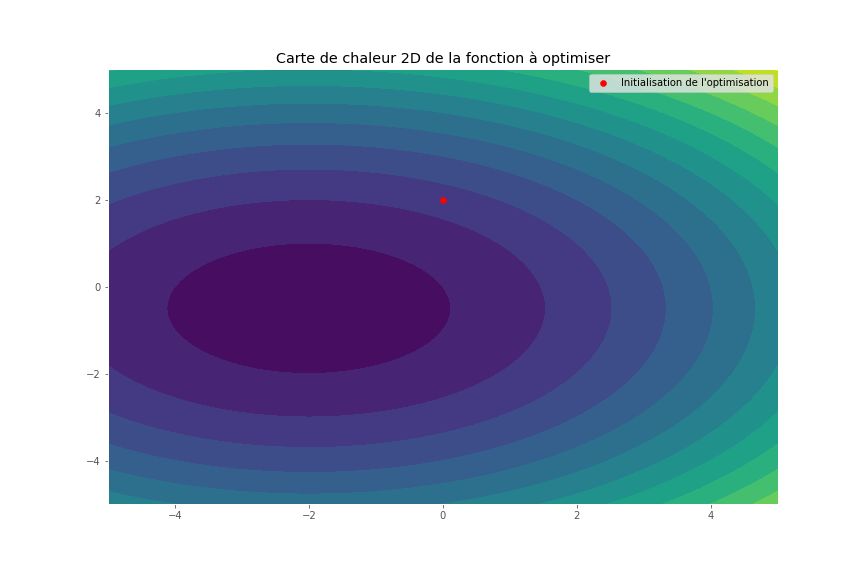

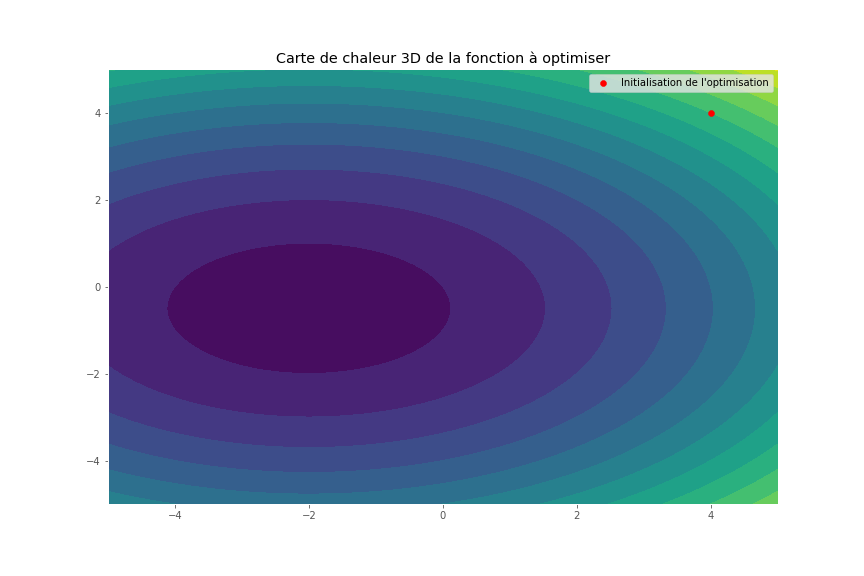

In [13]:
plot_loss_contour(f, three_dim=False, starting=[0, 2], 
                  title='Carte de chaleur 2D de la fonction à optimiser')
plot_loss_contour(f, three_dim=False, starting=[4, 4], 
                  title='Carte de chaleur 3D de la fonction à optimiser')

L'algorithme de descente de gradient nous permet d'avancer dans la bonne direction. Cependant, le choix du pas $\eta$ peut nous sembler insuffisant. 

Soit $\boldsymbol{\nu}=[x, y]^T$, la direction d'optimisation $\boldsymbol{d}^{(k)}=-\nabla f(\boldsymbol{\nu}^{(k)})$ et la fonction $\gamma:t\mapsto f(\boldsymbol{\nu}^{(k)}+t\boldsymbol{d}^{(k)})$. La valeur de $t$ qui minimise la fonction $\gamma$ est un pas optimal pour une minimisation dans la direction du gradient. Sans contrainte particulière sur la fonction $f$, $\gamma$ pourrait admettre un certain nombre de points critiques de natures et de valeurs différentes.

Les points critiques sont les points d'annulation de la dérivée : $\{t\in\mathbb{R}:\ \gamma^\prime(t)=0\}$. On obtient assez facilement la dérivée de la manière suivante&nbsp;:

$$\gamma^\prime(t)=\frac{\partial f}{\partial x}\left(\boldsymbol{\nu}^{(k)}+t\boldsymbol{d}^{(k)}\right)\frac{\partial f}{\partial x}\left(\boldsymbol{\nu}^{(k)}\right)+\frac{\partial f}{\partial y}\left(\boldsymbol{\nu}^{(k)}+t\boldsymbol{d}^{(k)}\right)\frac{\partial f}{\partial y}\left(\boldsymbol{\nu}^{(k)}\right)$$

On remarque que résoudre cette équation est rapidement problématique et nécessite l'utilisation d'un autre algorithme de descente de gradient. En réalité, il y a grossièrement deux possibilités :
1. On peut trouver une valeur $t$ analytiquement et c'est le choix qu'on doit faire,
2. Il n'est pas possible de calculer $t$ et on doit le calculer numériquement. Cependant, si on doit le calculer numériquement, alors, il devient nécessaire de calculer le gradient à chaque étape, et dans ce cas, pourquoi ne pas juste se déplacer dans l'espace des paramètres avec notre vecteur $\boldsymbol{[x, y]}$ ce qui nous donnerait une meilleure direction dans l'espace des paramètres...


Il se trouve que la fonction définie ci-dessus est : $f(\boldsymbol{x})=\frac{1}{2}\langle Ax, x\rangle+\langle b, x\rangle$ où&nbsp;:


$$A=\begin{bmatrix} 1& 0\\ 0& 2\end{bmatrix}$$

est symétrique définie positive et 


$$b=\begin{bmatrix}2\\1\end{bmatrix}$$

Notons 

$$\begin{aligned}
f(\boldsymbol{x}+t\boldsymbol{d})&=\frac{1}{2}\langle A(x+t\boldsymbol{d}), x+t\boldsymbol{d}\rangle+\langle b, x+t\boldsymbol{d}\rangle\\
&=\frac{1}{2}(\langle A\boldsymbol{x},\boldsymbol{x}\rangle+t\langle A\boldsymbol{d},\boldsymbol{x}\rangle+t\langle A\boldsymbol{x},\boldsymbol{d}\rangle+t^2\langle A\boldsymbol{d},\boldsymbol{d}\rangle)+\langle \boldsymbol{b},\boldsymbol{x}\rangle+t\langle \boldsymbol{b},\boldsymbol{d}\rangle\\
&=f(\boldsymbol{x})+\frac{1}{2} t^2\langle A\boldsymbol{d},\boldsymbol{d}\rangle+t\langle A\boldsymbol{x}+\boldsymbol{b},\boldsymbol{d}\rangle
\end{aligned}$$

Notons de plus que $\partial f(\boldsymbol{x})/\partial \boldsymbol{x}=A\boldsymbol{x}+\boldsymbol{b}=-\boldsymbol{d}$. Nous avons donc&nbsp;:


$$f(\boldsymbol{x}+t\boldsymbol{d})=f(\boldsymbol{x})+\frac{1}{2} t^2\langle A\boldsymbol{d},\boldsymbol{d}\rangle-t\langle \boldsymbol{d},\boldsymbol{d}\rangle=f(\boldsymbol{x})+\frac{1}{2} t^2\langle A\boldsymbol{d},\boldsymbol{d}\rangle-\left\lVert\boldsymbol{d}\right\lVert^2 t$$


La direction $\boldsymbol{d}=-\nabla f(\boldsymbol{x})$ est celle qui indique la plus forte pente. La variable $t$ recherchée indique la taille du pas que l'on souhaite faire. Pour cela, nous devons chercher les points critiques de la fonction $\gamma(t)=f(\boldsymbol{x}+t\boldsymbol{d})$ qui sont donnés en recherchant les points d'annulation de la dérivée. De plus, $A$ (la Hessienne) étant définie positive, nous savons que ces points critiques seront des minimums. Nous avons donc&nbsp;:

$$\frac{\partial \gamma}{\partial t}(t)=t\langle A\boldsymbol{d}, \boldsymbol{d}\rangle - \left\lVert\boldsymbol{d}\right\lVert^2=0$$

Et le point critique est donné par&nbsp;:

$$t=\frac{\left\lVert\boldsymbol{d}\right\lVert^2}{\langle A\boldsymbol{d}, \boldsymbol{d}\rangle}$$

**<span style='color:blue'> Exercice</span>** **Donnez le code permettant de calculer le gradient (i.e. la direction d'optimisation).**


 ----

In [14]:
def grad(x):
    ####### Complete this part ######## or die ####################
    return np.dot(A, x)+b
    ###############################################################


**<span style='color:blue'> Exercice</span>** **Donnez le code permettant de calculer une itération de l'algorithme de descente de gradient avec un pas optimal.**


 ----

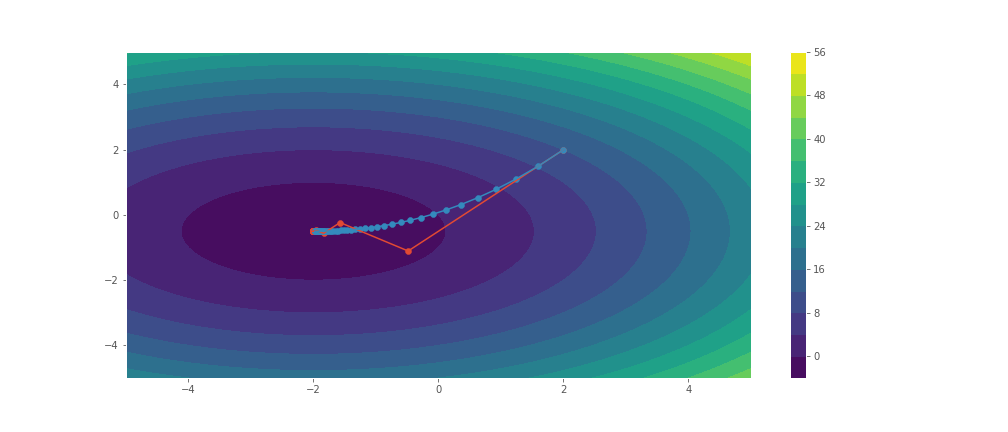

In [15]:
class OptimalStepGradientDescent(object):
    def optimize(self, learning_rate=0.1, nb_iterations=15, beta=None):
        if beta is None:
            beta = np.random.uniform(-2, 2, size=(2, 1))
        else:
            beta = beta.reshape((2, 1))
            
        beta2 = beta.copy()

        param_trace = [beta]
        param_trace2 = [beta2]
        loss_trace = [f(beta)]
        loss_trace2 = [f(beta2)]
        it = 0
        stop = False
        
        for i in range(nb_iterations):
            d = -grad(beta)
            if d[0, 0] == d[1, 0] == 0.:
                stop = True
            else:
                ####### Complete this part ######## or die ####################
                t = np.linalg.norm(d)**2/np.dot(np.dot(A, d).T, d)
                beta = beta + t[0, 0] * d
                ###############################################################
                
                param_trace.append(beta)
                loss_trace.append(f(beta))
            
            # cette partie du code permet de calculer le gradient classique
            # afin que nous puissions le comparer avec la descente de gradient
            # à pas optimal.
            beta2 = beta2 - learning_rate * grad(beta2)
            param_trace2.append(beta2)
            loss_trace2.append(f(beta2))
            it += 1
        return (np.array(param_trace), np.array(loss_trace), 
                np.array(param_trace2), np.array(loss_trace2))
        
gd = OptimalStepGradientDescent()

p1, _, p2, _ = gd.optimize(learning_rate=0.1, nb_iterations=50, beta=np.array([2, 2]))

plot_loss_contour(f, (p1, p2), figsize=(14.0, 6.0))


In [16]:
# L'affichage suivant interactif va nous permettre de tester les différents paramètres de notre optimiseur.

import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output
%matplotlib inline

output = widgets.Output()

@output.capture()
def interactive_gradient_descent(learning_rate, x, y, iterations):
    clear_output()
    p1, l1, p2, l2 = gd.optimize(learning_rate=learning_rate, nb_iterations=iterations,
                                           beta=np.array([x, y]))
    plot_loss_contour(f, (p1, p2), figsize=(14.0, 6.0))
    
widgets.interact(interactive_gradient_descent,
                 learning_rate=widgets.FloatSlider(value=1e-5, min=1e-5, max=1., step=0.0001, 
                                                   continuous_update=False, readout_format='.5f'),
                 x=widgets.FloatSlider(value=0, min=-4, max=4, step=0.1, continuous_update=False),
                 y=widgets.FloatSlider(value=0, min=-4, max=4, step=0.1, continuous_update=False),
                 iterations=widgets.IntSlider(value=1, min=1, max=20, step=1, continuous_update=False)
)
display(output)


interactive(children=(FloatSlider(value=1e-05, continuous_update=False, description='learning_rate', max=1.0, …

Output()

--- 

**<span style='color:blue'> Exercice (dur)</span>** 
**Soit $A\in\mathcal{S}_n(\mathbb{R})$, $b\in\mathbb{R}^n$. Montrer que notre fonction&nbsp;:**

$$\begin{aligned}f:\mathbb{R}^n&\rightarrow \mathbb{R}\\
x&\mapsto \frac{1}{2}x^TAx-b^Tx\end{aligned}$$

**admet un *unique minimum* si, et seulement si $\text{Sp}(A)\subset\mathbb{R}^+$ et $b\in\text{Im}(A)$.**



 ----
**<span style='color:green'> Indices</span>** Rappelons que $\mathcal{S}_n(\mathbb{R})$ représente les matrices réelles symétriques de taille $n\times n$, $\text{Sp}(A)$ est le spectre de $A$ (i.e. ses valeurs propres) et $\text{Im}(A)$, l'image de $A$.


 ----




## III. La descente de coordonnées

La descente de coordonnées ou *coordinate descent* consiste à optimiser une fonction multivariée variable par variable. Soit $f:\mathbb{R}^d\mapsto\mathbb{R}$ et le problème d'optimisation suivant&nbsp;:

$$x^\star=\text{argmin}_{x\in\mathbb{R}^d}f(x).$$

Contrairement à la descente de gradient classique, ici, lors d'une étape d'optimisation, une unique variable est mise à jour à la fois : 

$$x^{(t)}_i=\text{argmin}_{x\in\mathbb{R}}f(x^{(t)}_1,\ldots, x_{i-1}^{(t)}, x, x_{i+1}^{(t-1)}, \ldots, x_d^{(t-1)}).$$

Considérons la fonction à deux variables suivantes&nbsp;: $f(x, y)=5x^2-6xy+5y^2$.

In [17]:
def f(x):
    return 5*np.power(x[0], 2)-6*x[0]*x[1]+5*np.power(x[1], 2)

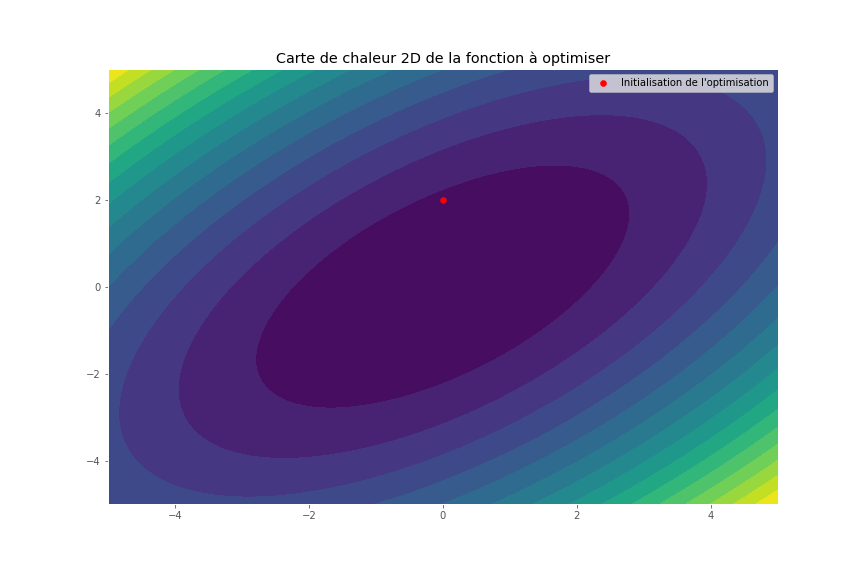

In [18]:
plot_loss_contour(f, three_dim=False, starting=[0, 2], 
                  title='Carte de chaleur 2D de la fonction à optimiser')

Considérons $g_y(x)=f(x, y)$ comme une fonction de $x$ uniquement (i.e. $y$ est fixé) et dérivons&nbsp;:

$$g_y^\prime(x)=10x-6y.$$

Ainsi, l'itéré suivant pour la variable $x$ s'obtient de la manière suivante&nbsp;: $x^{(t)}=x^{(t-1)}-\eta g_y^\prime(x^{(t-1)})$. Le même raisonement s'étend de manière totalement symétrique pour obtenir l'itéré de la variable $y$ (remarquez que $f(x, y)= f(y, x)$).

**<span style='color:blue'> Exercice</span>** 
**Donnez le code permettant de calculer une itération de la méthode *coordinate descent*.**



 ----

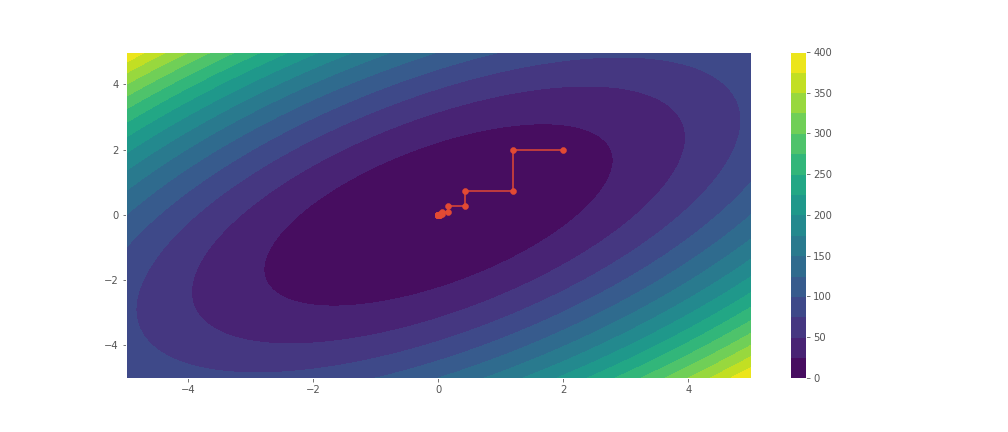

In [19]:
class CoordinateDescent(object):
    def optimize(self, x_start, nb_iterations=15, learning_rate=0.01):
        optimization_steps = [np.copy(x_start)]
        x_t = x_start
        
        for i in range(nb_iterations):
            ####### Complete this part ######## or die ####################
            x_t[0]=x_t[0]-learning_rate*(10*x_t[0]-6*x_t[1])
            ###############################################################

            optimization_steps.append(np.copy(x_t))
            
            ####### Complete this part ######## or die ####################
            x_t[1]=x_t[1]-learning_rate*(10*x_t[1]-6*x_t[0])
            ###############################################################
            
            optimization_steps.append(np.copy(x_t))

            
        return np.array(optimization_steps)
        
coordinate = CoordinateDescent()

param_trace = coordinate.optimize(
    x_start=np.array([2., 2.]), 
    nb_iterations=20, 
    learning_rate=0.1
)
plot_loss_contour(f, param_trace, figsize=(14.0, 6.0))


In [20]:

# L'affichage suivant interactif va nous permettre de tester les différents paramètres de notre optimiseur.

import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output
%matplotlib inline

output = widgets.Output()

@output.capture()
def interactive_gradient_descent(learning_rate, x, y, iterations):
    clear_output()
    param_trace = coordinate.optimize(x_start=np.array([x, y]),
                                      nb_iterations=iterations,
                                      learning_rate=learning_rate)
    plot_loss_contour(f, param_trace, figsize=(14.0, 6.0))
    
widgets.interact(interactive_gradient_descent,
                 learning_rate=widgets.FloatSlider(value=1e-5, min=1e-5, max=0.1, step=0.0001, 
                                                   continuous_update=False, readout_format='.5f'),
                 x=widgets.FloatSlider(value=-2, min=-4, max=4, step=0.1, continuous_update=False),
                 y=widgets.FloatSlider(value=-2, min=-4, max=4, step=0.1, continuous_update=False),
                 iterations=widgets.IntSlider(value=1, min=1, max=20, step=1, continuous_update=False)
)
display(output)


interactive(children=(FloatSlider(value=1e-05, continuous_update=False, description='learning_rate', max=0.1, …

Output()